In [25]:
# 📌 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
import sys
import os

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)  # Add the project root to Python path

# Import reusable scripts
from scripts.data_loader import load_data  # Load dataset
from scripts.eda import summarize_data, plot_distributions  # EDA functions
from scripts.preprocessing import fill_missing_values  # Handle missing values
from scripts.feature_engineering import extract_title, create_family_size  # Feature engineering


In [37]:
# Reload modules if any change was applied
import importlib

import scripts.eda  # Ensure the module is recognized
importlib.reload(scripts.eda)  # Force reload

# Now, import the updated functions

from scripts.eda import summarize_data, plot_distributions


In [41]:
# 📌 Step 2: Load Dataset
df = load_data()  # Ensure correct path

# 📌 Step 3: Dataset Overview
summarize_data(df)  # Uses script function


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

📌 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687


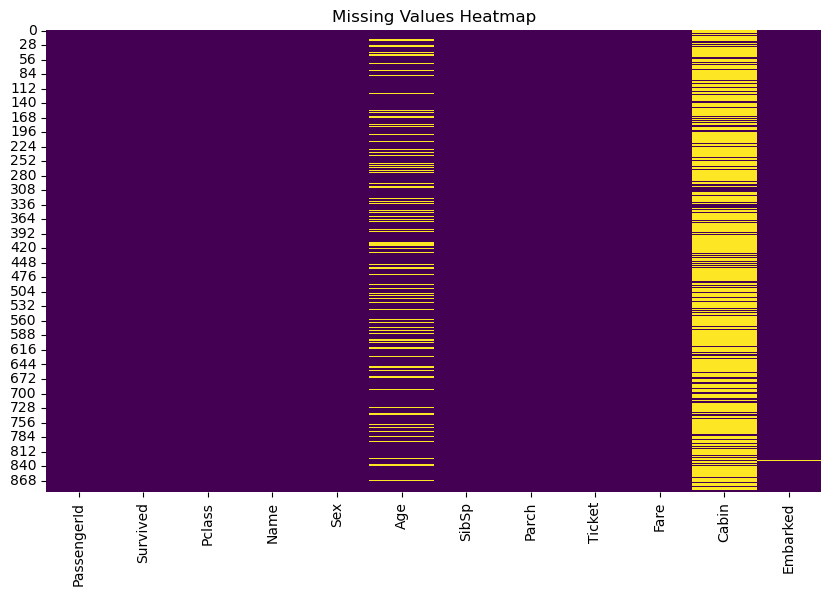

In [42]:
# 📌 Step 4: Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

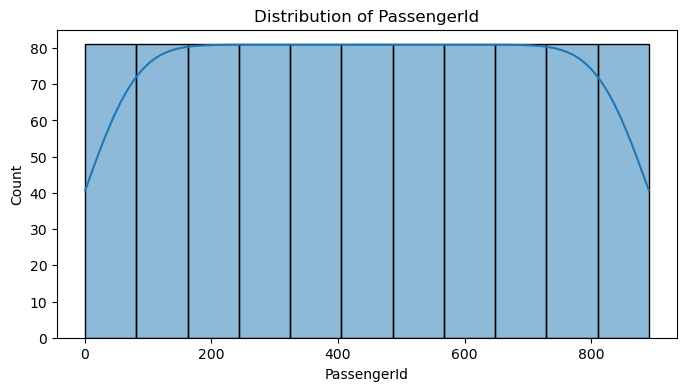

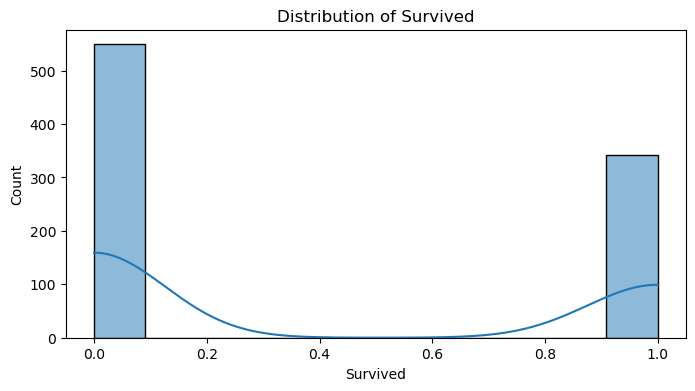

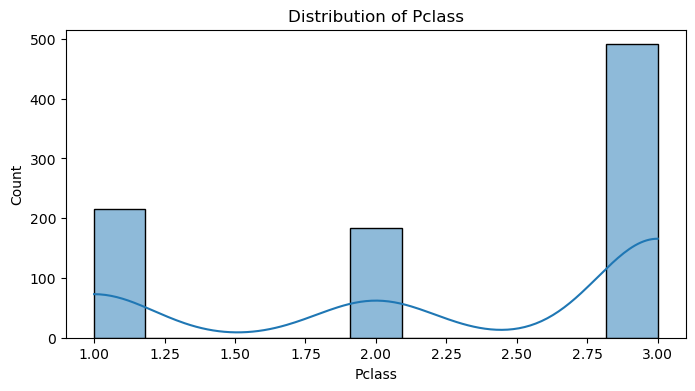

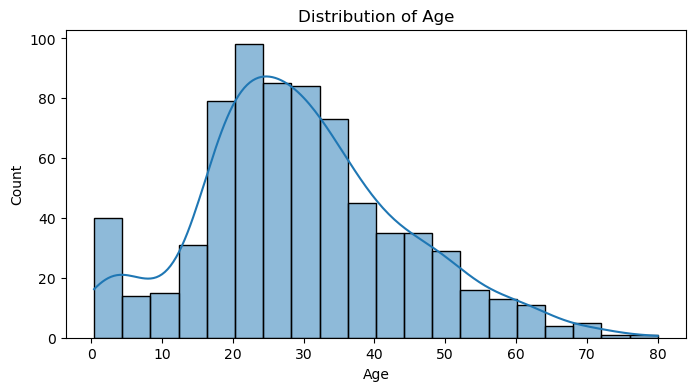

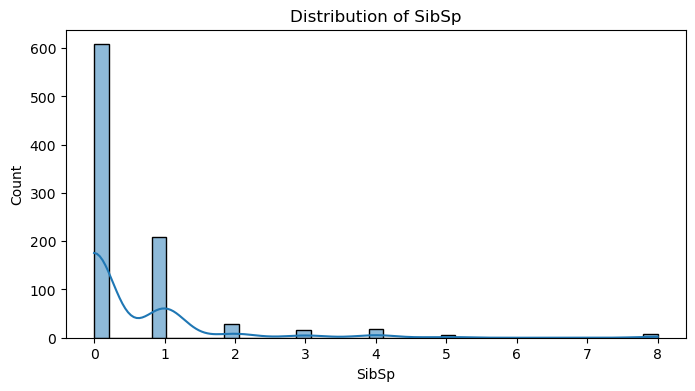

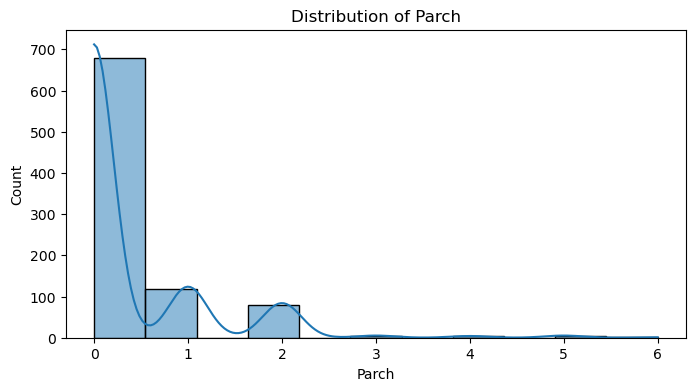

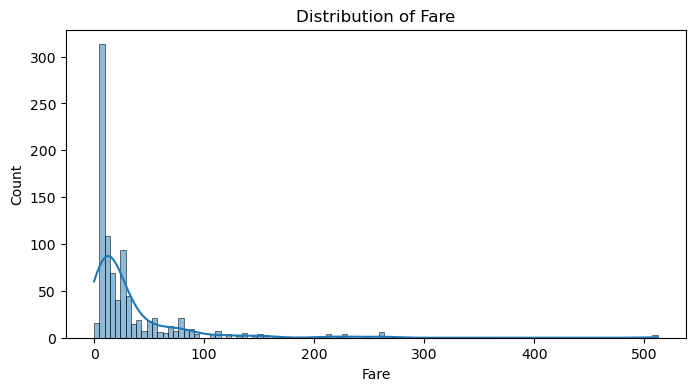

In [43]:
# 📌 Step 5: Numeric Features Distribution
plot_distributions(df)  # Uses script function